# DiCaprio y el Titanic

https://www.kaggle.com/c/titanic
https://www.kaggle.com/c/titanic/data

Dentro de la Rama de Machine Learning tenemos la siguiente clasificacion: 

Algoritmos de aprendizaje supervisado

Algoritmos de aprendizaje No supervizado

Algoritmos de aprendizaje por refuerzo

Nosotros vamos a ver un ejemplo Algoritmo de Regresion Logistica que es un tipo particular de aprendizaje supervisado



In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# LOS DATOS


Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Leemos los datos desde pandas

train = pd.read_csv('titanic_train.csv')


In [43]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


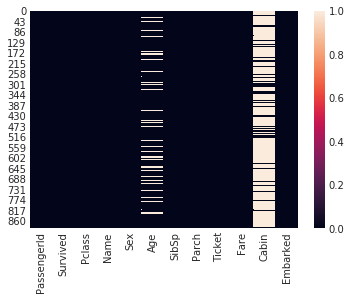

In [44]:
# Analizamos el dataset y lo limpiamos para poder usar Logistic Regression
sns.set_style('whitegrid')
sns.heatmap(train.isnull())

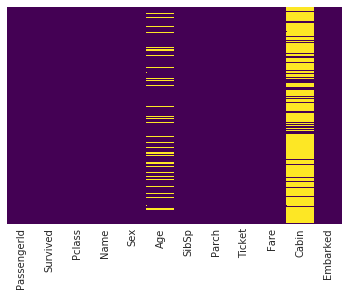

In [45]:
# Vemos que nos faltan muchos datos en la columna Cabina y algunos en la columna Edad ...
# Veamos los datos con un poco mas de datalle
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
# Efectivamente no parece que podamos utilizar la columna Cabina pero tal vez podamos hacer algo con la columna edad
# Tenemos que limpiar nuestro dataset para que tengamos unica y exclusivamente datos numericos y NINGUN dato en NUL


# El Analisis de los Datos

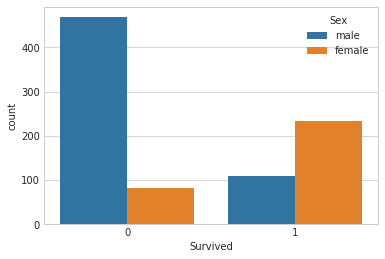

In [47]:
# Vamos a comparar por Sexo en relacion a la columna que indica si han sobrevivido o no ....
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue='Sex',data=train)

In [48]:
# Bueno ... aqui, sin mucho mas podemos comprobar que las probabilidades de supervivencia de los hombre no es muy alta
# Asi que esto augura ya de por si un futuro algo negro para nuestro amigo diCaprio :-/


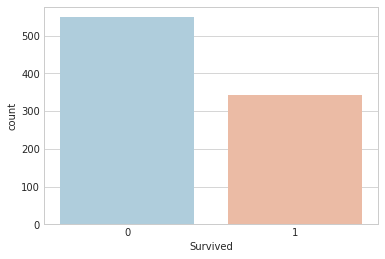

In [49]:
# Si obviamos el tema por Sexos ... podemos ver que la probabilidad de sobrevivir estaria algo por encima del 50%
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

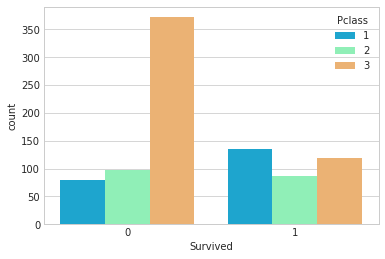

In [50]:
# Ahora desde una perspectiva en funcion del tipo de billete ( primera clase, segunda, tercera)

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [51]:
# En la peli nuestro amigo conseguia un billete de 3 Clase :-) Asi que Si vemos las graficas 
# En tercera clase y hombre ... como que no tendria demasiadas probabilidades de sobrevivir ... 


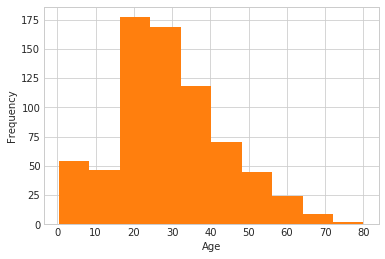

In [52]:
# Veamos ahora la distribucion por edades del pasaje ... agrupada y desechando los datos de edades en NULL
sns.distplot(train['Age'].dropna(),kde=False,bins=50)
train['Age'].plot.hist()

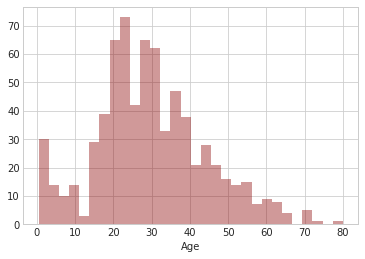

In [53]:
# Usando Seaborn Tenemos 
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
# La mayor parte del pasaje esta entre los 20 y los 40 de edad ...

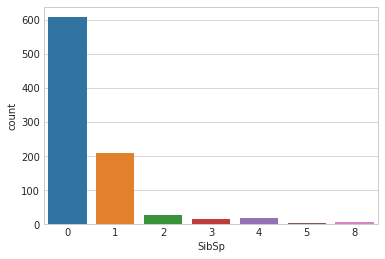

In [54]:
# Analicemos tambien la gente que iba con familiares .... 
sns.countplot(x='SibSp',data=train)
# Podmeos ver que la mayoria iba solo y que pocos iban con un solo pariente ..

In [55]:
# Ahora analizamos los tipos de los datos en nuestro dataset 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


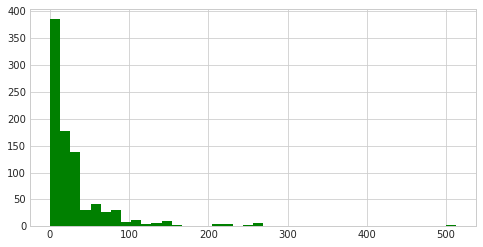

In [56]:
# Otro dato de interes puede ser la 'tarifa' o 'precio' del billete
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# PREPARANDO EL DATASET LIMPIANDO DATOS

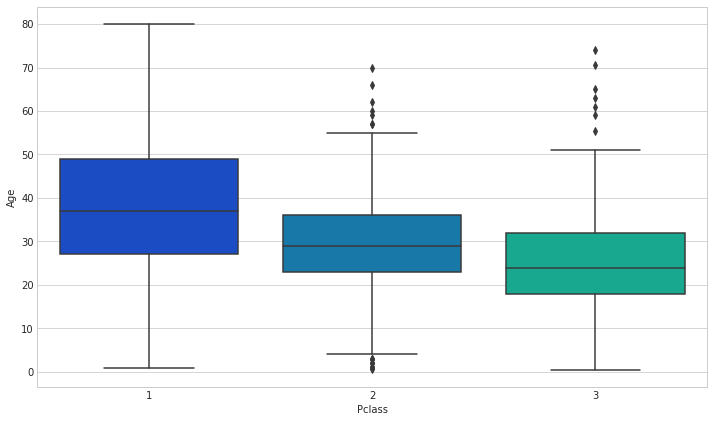

In [57]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [58]:
# Con esta grafica podemos ver que podemos 'extrapolar' los datos de las edades en funcion de la Clase del billete
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [59]:
# los pandas DataFrame nos permiten ejecutar un apply a todo el DataSet algo muy util como podemos ver 
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

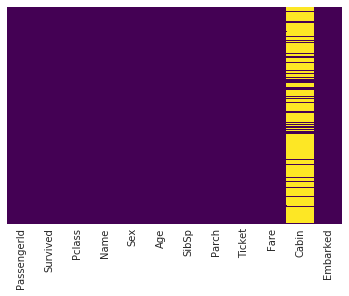

In [60]:
# Comprobamos que el DataSet ahora esta completo para las edades ....
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [61]:
# Perfecto!!! 
# Limpiamos el DataSet descartando el tema de la cabina ... no es recuperable 
train.drop('Cabin',axis=1,inplace=True)


In [62]:
# Este ya es el DataSet 'limpio' algun que otro valor con null en Embarked que limpiamos y listo
train.dropna(inplace=True)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Conviertiendo Categorias en Caracteristicas numericas ...


In [63]:
# Esto aumentara el numero de columnas pero 'permite' aplicar los algoritmos al dataset
# Por ejemplo con Sexo ...

sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [64]:
sex

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [65]:
# Eliminamos lo que no es util o no esta en el formato adecuado ...
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [66]:
# Lo concatenamos con el resto de DataFrame que acabamos de pasar a 'caracteristicas'
train = pd.concat([train,sex,embark],axis=1)
# El PassengerId no es un dato relevante ya que tan solo es una secuencia que no tiene relacion con los datos asi que..
train.drop('PassengerId',axis=1,inplace=True)

In [67]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


# Comenzamos a crear el modelo de Regresion Logistica :-)

In [69]:
# Separamos la chicha de la limonada .... el DataSet con los datos y el DataSet con el Resultaldo 
# Nos importa saber si 'vive' o 'muere'
X = train.drop('Survived',axis=1)
y = train['Survived']

In [70]:
# Separamos los datos para poder crear la 'bateria de test' con la que poder crear el 'aprendizaje'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [71]:
# Entrenamos el modelo y aplicamos Predicciones ...
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
# aplicamos nuestro modelo predictivo con la bataria de Test que dejamos 'fuera' del aprendizaje ...
predictions = logmodel.predict(X_test) 
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

# Evaluando el resultado de nuestro modelo predictivo con la bateria de Test

In [74]:
# Utilizamos las herramientas de calculo de metricas de los modelos de aprendizaje 
from sklearn.metrics import classification_report


In [75]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [76]:
# Esto es la comparativa entre la prediccion y el 'valor' real
# Veamos ahora la Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)


array([[148,  15],
       [ 36,  68]])

In [117]:
# Aplicando el modelo a nuestro amigo DiCaprio ..... 
#d = {'col1': [1, 2], 'col2': [3, 4]}
#df = pd.DataFrame(data=d)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 511 to 634
Data columns (total 8 columns):
Pclass    267 non-null int64
Age       267 non-null float64
SibSp     267 non-null int64
Parch     267 non-null int64
Fare      267 non-null float64
male      267 non-null uint8
Q         267 non-null uint8
S         267 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 13.3 KB


In [218]:

diCaprio = {'Pclass': 3, 'Age': 19.0, 'SibSp': 0, 'Parch': 0, 'Fare': 8.0, 'male': 0, 'Q': 1, 'S': 0}

In [219]:
diCaprioDF = pd.DataFrame([diCaprio], columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'])

In [220]:
diCaprioDF

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,19.0,0,0,8.0,0,1,0


In [221]:

prediccion = logmodel.predict(diCaprioDF)
prediccion

array([1])

In [222]:
# si es 0 muere si es 1 vive !!! 
# Con una probabilidad del 81% ... eso si :-)
